## Task 6.1 
## Sourcing Open Data 


### Importing Data

In [205]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
citibike_df = pd.read_csv("data\citibike.csv")

# Display the first few rows of the dataset
citibike_df.head(3)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1


### Handling Missing 

In [206]:
# Checking for missing values in each column
citibike_df.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

In [207]:
# drop missing values
citibike_df = citibike_df.dropna()
citibike_df.shape

(43021, 18)

The birth_year column had 6,979 missing values.

### Handling outliers

In [208]:
# Removing the outliers
# Calculate Q1 and Q3
Q1 = citibike_df['trip_duration'].quantile(0.25)
Q3 = citibike_df['trip_duration'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = citibike_df[(citibike_df['trip_duration'] >= lower_boundary) & 
                              (citibike_df['trip_duration'] <= upper_boundary)]

# Display the shape of the original data and the filtered data
original_shape = citibike_df.shape[0]
filtered_shape = filtered_data.shape[0]

original_shape, filtered_shape

(43021, 41044)

### Data Types

In [209]:
# Checking the data types of each column
filtered_data.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
dtype: object

In [210]:
# Checking for duplicate rows
filtered_data.duplicated().sum()

0

### Data Manipulation

In [211]:
# Convert 'start_time' and 'end_time' to datetime format
filtered_data['start_time'] = pd.to_datetime(filtered_data['start_time'])
filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'])

In [212]:
# Extract month, week, and hour from the 'start_time' column
filtered_data['start_week'] = filtered_data.start_time.apply(lambda x: x.week)
filtered_data['start_day'] = filtered_data.start_time.apply(lambda x: x.day)
filtered_data['start_hour'] = filtered_data.start_time.apply(lambda x: x.hour)
# Extract month, week, and hour from the 'end_time' column
filtered_data['end_week'] = filtered_data.end_time.apply(lambda x: x.week)
filtered_data['end_day'] = filtered_data.end_time.apply(lambda x: x.day)
filtered_data['end_hour'] = filtered_data.end_time.apply(lambda x: x.hour)

In [213]:
# Calculate the difference between 'end_time' and 'start_time' in seconds
filtered_data['Ride_duration'] = (filtered_data['end_time'] - filtered_data['start_time']).dt.total_seconds()

filtered_data["Ride_duration_hrs"] = filtered_data["Ride_duration"]/3600

# Checking if there are any discrepancies between 'trip_duration' and 'calculated_duration'
discrepancies_duration = filtered_data[filtered_data['trip_duration'] != filtered_data['Ride_duration']]

discrepancy_count = len(discrepancies_duration)
discrepancy_count

0

437 rows showed discrepancies between the trip_duration column and the actual difference between start_time and end_time.

In [214]:
# Map datetime weekdays to their string representation
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

# Check if there are any discrepancies between 'weekday' column and the actual weekday of 'start_time'
filtered_data['calculated_weekday'] = filtered_data['start_time'].dt.weekday.map(weekday_map)
discrepancies_weekday = filtered_data[filtered_data['weekday'] != filtered_data['calculated_weekday']]

discrepancy_weekday_count = len(discrepancies_weekday)
discrepancy_weekday_count

0

The weekday column was consistent with the start_time date

In [215]:
# Calculate the age of the riders based on the data's latest year (2013)
filtered_data['age'] = 2013 - filtered_data['birth_year']

# Define age bins
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Categorize the ages into the bins
filtered_data['age_group'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)


In [216]:
# Define a mapping for gender values to labels
gender_map = {0: 'Unknown', 1: 'Male', 2: 'Female'}

# Apply the mapping to the gender column
filtered_data['gender_label'] = filtered_data['gender'].map(gender_map)

In [217]:
filtered_data.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,start_day,end_week,end_day,end_hour,Ride_duration,Ride_duration_hrs,calculated_weekday,age,age_group,gender_label
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,9,37,9,18,993.0,0.275833,Mon,45.0,40-50,Female
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,12,37,12,18,581.0,0.161389,Thu,30.0,30-40,Male
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,18,38,18,19,361.0,0.100278,Wed,24.0,18-30,Male
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,28,39,28,12,561.0,0.155833,Sat,25.0,18-30,Female
5,HbKJBz,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,...,27,39,27,22,427.0,0.118611,Fri,27.0,18-30,Female


### What were the average times per trip?

In [218]:
# The average trip duration in seconds
average_duration_seconds = filtered_data['Ride_duration'].mean()

# The average duration to minutes for better interpretability
average_duration_seconds / 60

11.61044894909528

In [219]:
# Group by weekday and count the number of rides for each day
filtered_data.groupby('weekday').size()

weekday
Fri    6321
Mon    6495
Sat    4677
Sun    5194
Thu    5982
Tue    6172
Wed    6203
dtype: int64

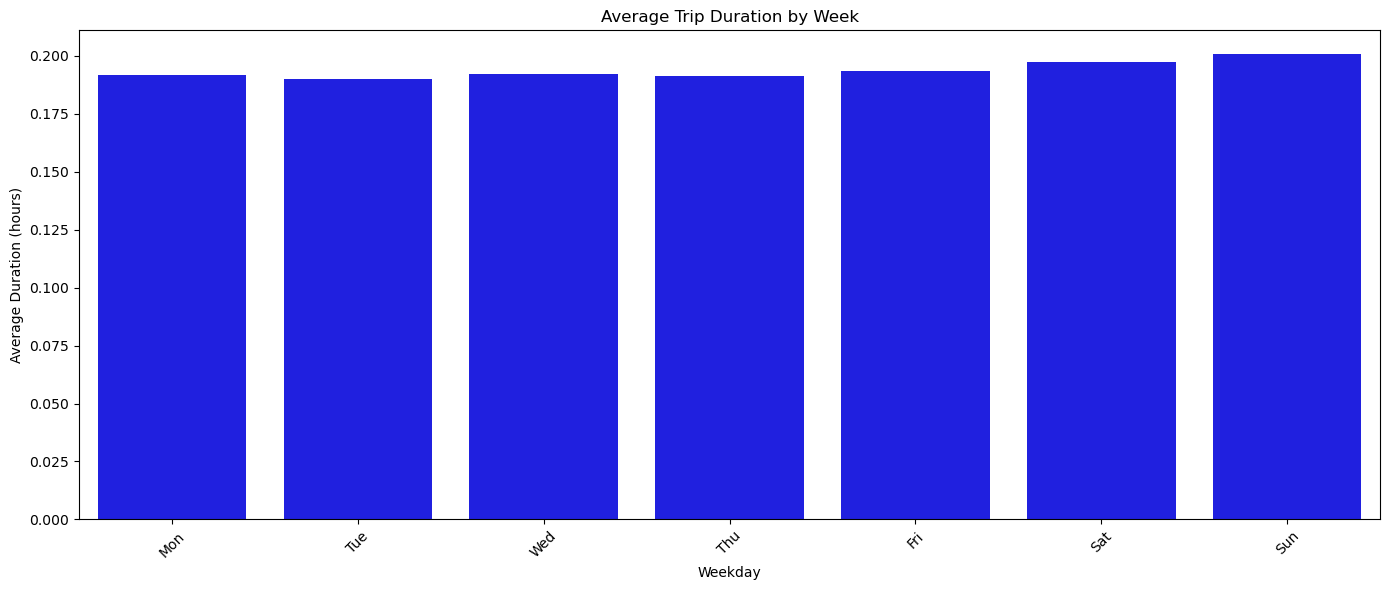

In [220]:
# Plot Average Duration by Week
plt.figure(figsize=(14, 6))
sns.barplot(x='weekday', y='Ride_duration_hrs', data=filtered_data, 
            ci=None, color="blue", 
            order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Trip Duration by Week')
plt.ylabel('Average Duration (hours)')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weekdays: The demand for rides is relatively consistent across the weekdays, with Monday having the highest number of rides and Thursday having the lowest. The differences between weekdays aren't substantial.

Weekends: Saturday and Sunday see a noticeable drop in the number of rides compared to weekdays. Among the weekends, Sunday has slightly higher rides than Saturday.

The demand is generally higher on weekdays, which could be attributed to daily commuting needs.
The weekend sees a reduced number of rides, possibly because people tend to use bikes more for leisure activities, which may not be as frequent as daily commuting. This is consistent given that the average trip duration during the weekends is higher compared to the weekdays

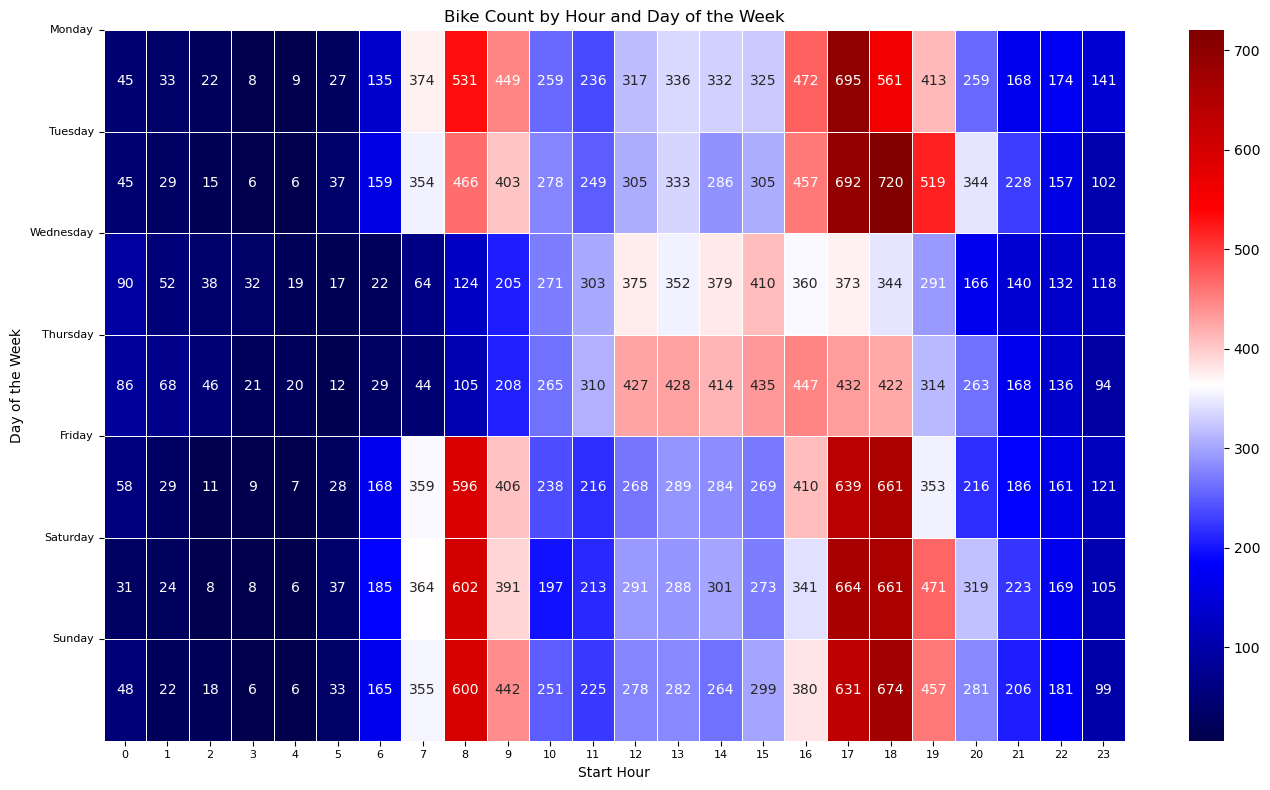

In [221]:
# Group the data by 'weekday' and 'start_hour' to get bike count
bike_count_by_hour_day = filtered_data.groupby(['weekday', 'start_hour']).size().unstack()

# Plot heatmap for bike count by hour and day
plt.figure(figsize=(14, 8))
sns.heatmap(bike_count_by_hour_day, cmap='seismic', linewidths=.5, annot=True, fmt=".0f")
plt.title('Bike Count by Hour and Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Start Hour')
plt.tick_params(labelsize=8)
plt.yticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.tight_layout()
plt.show()

### Bike Count by Hour and Day of the Week

The heatmap reveals distinct patterns in bike usage. Peak times are evident during the morning (around 7-9 am) and evening (around 4-7 pm) hours, especially on weekdays, suggesting a significant reliance on bikes for work or school commuting. In contrast, weekend usage is more evenly distributed throughout the day, hinting at more recreational or non-work-related trips. Additionally, a mid-day drop in bike usage on weekdays can be observed, which might be influenced by factors such as weather or a reduced need for commuting during those hours.

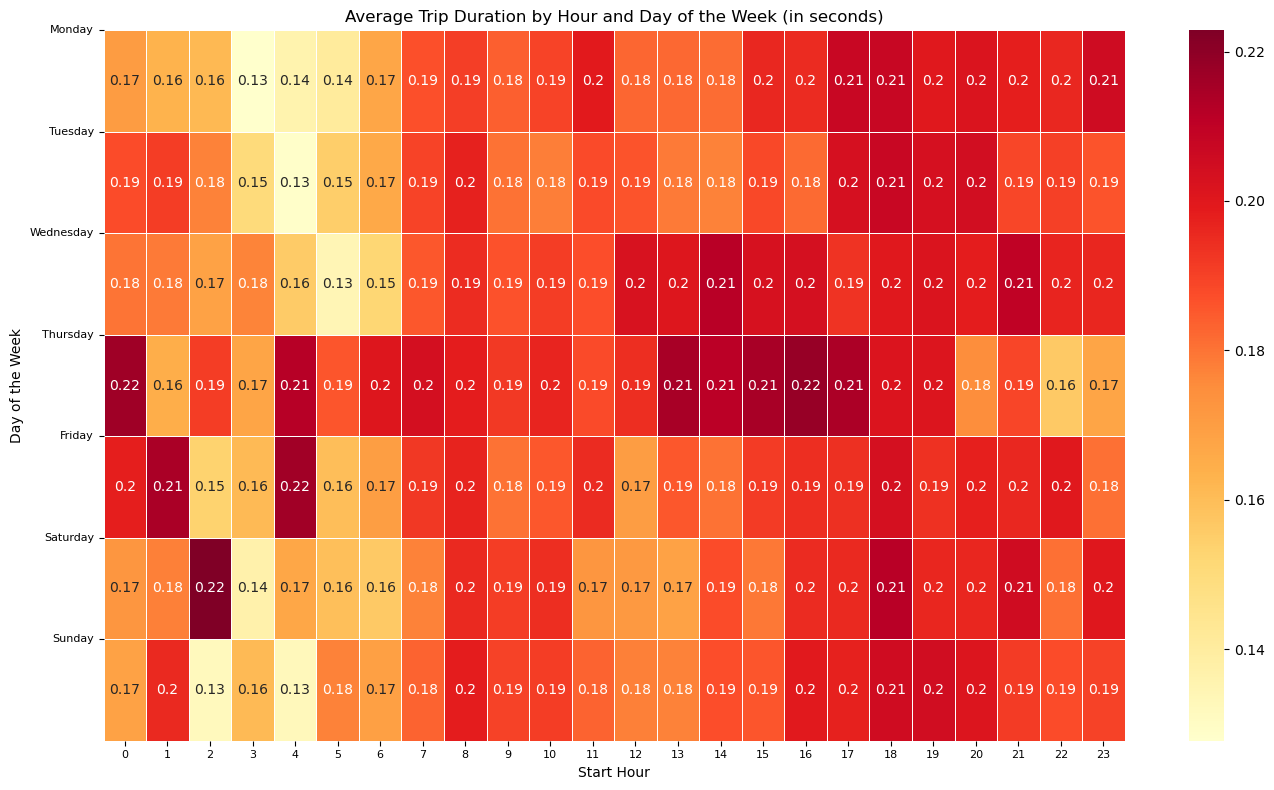

In [222]:
# Group the data by 'weekday' and 'start_hour' to get average trip duration
avg_duration_by_hour_day = filtered_data.groupby(['weekday', 'start_hour'])['Ride_duration_hrs'].mean().unstack()

# Plot heatmap for average duration by hour and day
plt.figure(figsize=(14, 8))
sns.heatmap(avg_duration_by_hour_day, cmap='YlOrRd', linewidths=.5, annot=True)
plt.title('Average Trip Duration by Hour and Day of the Week (in seconds)')
plt.ylabel('Day of the Week')
plt.xlabel('Start Hour')
plt.tick_params(labelsize=8)
plt.yticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.tight_layout()
plt.show()


### Average Trip Duration by Hour and Day of the Week

While the frequency of bike trips varies, the average duration remains fairly consistent across different hours and days. However, a few exceptions stand out. Weekends, particularly Sunday mornings, show slightly longer average trip durations, possibly due to leisurely or recreational rides. Late nights and early mornings also witness extended trip durations, which could be attributed to the nature of rides during these unconventional hours or influenced by fewer overall trips skewing the average. These insights emphasize the versatility of bike usage, serving both short, quick commutes and longer, leisurely rides, depending on the time and day.

In [223]:
df = filtered_data[['trip_id', 'bike_id', 'start_station_id', 'Ride_duration_hrs', 
                               'start_time', 'end_time', 'start_hour', 'end_hour',
                                'start_day','end_day',
                               'start_week', 'end_week', 'start_station_name',
                               'start_station_latitude','start_station_longitude', 
                               'end_station_name','end_station_latitude', 'end_station_longitude',
                               'subscriber', 'age', 'age_group', 'gender', 'gender_label', 'weekday']]


df.to_csv('citibike_clean.csv', index=False)

## Considerations of Limitations and Ethics:

- **Data Completeness**: The missing values in birth_year could introduce bias if age-related analyses are performed. his included the precense of outliers in duration.
- **Accuracy**: Discrepancies in trip_duration indicate potential data integrity issues.
- **Privacy**: While the dataset does not include directly identifiable personal information, the combination of data points (e.g., trip patterns, birth year, gender) could potentially be used to identify individuals, especially if combined with other datasets.
- **Representation**: If the dataset is a sample and not the entire population of trips, it might not be representative of all Citibike users.
- **Bias**: The dataset might have inherent biases, e.g., towards subscribers if non-subscribers use the system differently or less frequently.
- **Ethical Use**: Using this data to make decisions that could disproportionately affect a group of users (based on age, gender, etc.) would be unethical.